In [35]:
# Analysis - What are the main causes of Flight Delays

# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from pathlib import Path

In [36]:
# Import and read in csv file
file = Path("data.csv")
df = pd.read_csv(file)
df.shape


(2359976, 29)

In [37]:
df.head()

,Unnamed: 0,ORIGIN_AIRPORT_ID,Description,Code.y,Unnamed: 0_x,OP_UNIQUE_CARRIER,airline_name,Unnamed: 0_y,YEAR,MONTH,...,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,0,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,236754,2018,1,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237277,2018,1,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237781,2018,1,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759132,2018,3,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759644,2018,3,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [38]:
# Reduce columns to pertinent information only
df[['OP_UNIQUE_CARRIER', 'airline_name',
       'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df = df[['OP_UNIQUE_CARRIER', 'airline_name',
       'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df.dtypes



OP_UNIQUE_CARRIER       object
airline_name            object
YEAR                     int64
MONTH                    int64
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [39]:
# Reduce to only the three following airlines - Alaska, Frontier and Spirit
# condition1 = df['airline_name'] == ('Alaska', 'Frontier', 'Spirit')
condition1 = df ['airline_name'].isin(['Alaska', 'Frontier', 'Spirit'])
filtered_df = df[condition1]

df = filtered_df

In [40]:
df['airline_name'].unique()

array(['Alaska', 'Frontier', 'Spirit'], dtype=object)

In [41]:
pd.to_datetime(df['YEAR'])
pd.to_datetime(df['MONTH'])

df


,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
1,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
2,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
3,AS,Alaska,2018,3,0,NaN,NaN,NaN,NaN,NaN
4,AS,Alaska,2018,3,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
995,AS,Alaska,2020,6,0,NaN,NaN,NaN,NaN,NaN
996,AS,Alaska,2020,6,0,0.0,0.0,68.0,0.0,0.0
997,AS,Alaska,2020,6,0,NaN,NaN,NaN,NaN,NaN
998,AS,Alaska,2020,6,0,NaN,NaN,NaN,NaN,NaN


In [59]:
df[df['CARRIER_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')

Alaska      864283
Spirit      740596
Frontier    507545
Name: airline_name, dtype: int64

In [65]:
df[df['WEATHER_DELAY']!=0.0]['airline_name'].value_counts() \
.head() \
# .plot(kind='bar')

Alaska      812777
Spirit      682340
Frontier    438062
Name: airline_name, dtype: int64

In [66]:
# Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective 
# action by the airports or the Federal Aviation Administration. NAS_DELAY

df[df['NAS_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')

Alaska      915213
Spirit      790779
Frontier    510941
Name: airline_name, dtype: int64

In [67]:
df[df['SECURITY_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')


Alaska      809775
Spirit      676922
Frontier    434116
Name: airline_name, dtype: int64

In [69]:
df[df['LATE_AIRCRAFT_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')

Alaska      860993
Spirit      719671
Frontier    500572
Name: airline_name, dtype: int64

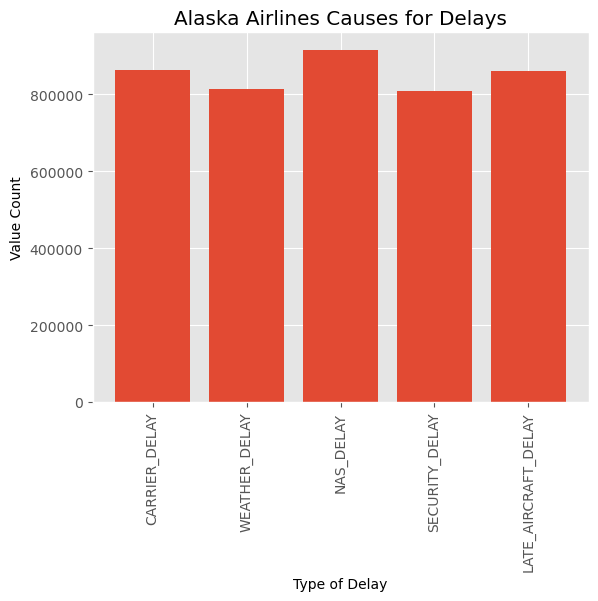

In [89]:
# Alaska
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [864283, 812777, 915213, 809775, 860993]

# Plot the values
plt.bar(x_values, y_values,)
plt.xticks(rotation = 'vertical')

# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Alaska Airlines Causes for Delays')

# Display the plot
plt.show()

C:\Users\e_pen\AppData\Local\Temp\ipykernel_2288\442825687.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('cool')


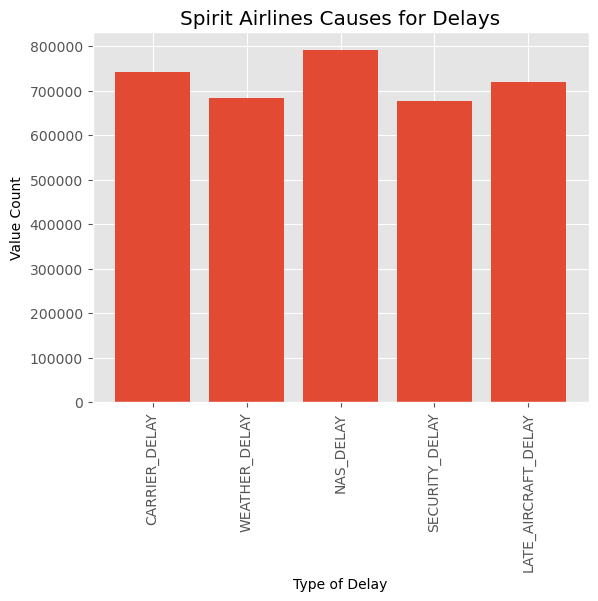

In [81]:
# Spirit
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [740596, 682340, 790779, 676922, 719671]

# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')

n, bins, patches = plt.hist(x_values)

# Choose a colormap
colormap = plt.cm.get_cmap('cool')

# Set gradient colors to the patches
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for patch, color in zip(patches, colormap(bin_centers)):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Spirit Airlines Causes for Delays')

# Display the plot
plt.show()

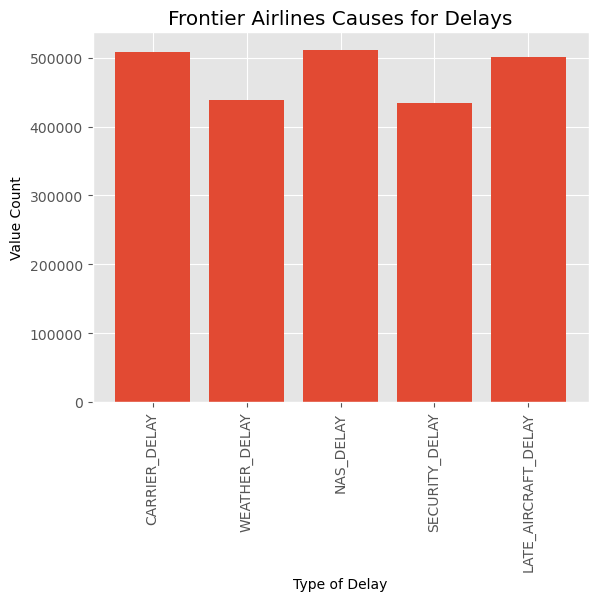

In [87]:
# Frontier

x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [507545, 438062, 510941, 434116, 500572]

# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')


# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Frontier Airlines Causes for Delays')

# Display the plot
plt.show()